In [ ]:
#################Parkinson Disease Prediction#########################

In [1]:
import numpy as np
import pandas as pd


df = pd.read_csv(r"C:\Users\sugan\Downloads\Mutiple disease pred-prj4\Parkinson_disease.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [8]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [4]:
print(df.columns.tolist())

['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


In [19]:
print("\nData Types:\n", df.dtypes)


Data Types:
 MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [3]:
print("Dataset shape:", df.shape)

Dataset shape: (195, 24)


In [2]:
print(df['status'].value_counts(dropna=False))

status
1    147
0     48
Name: count, dtype: int64


In [9]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


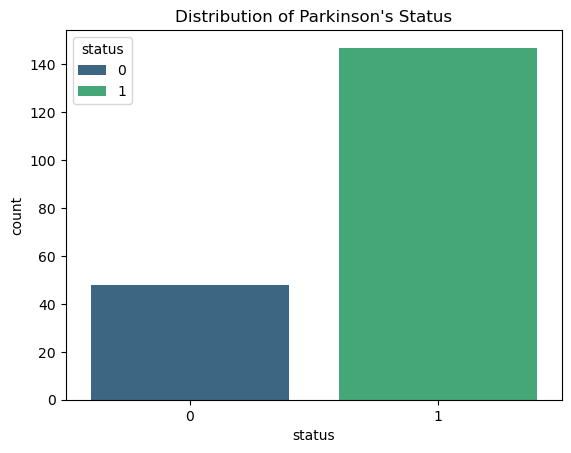

status
1    0.753846
0    0.246154
Name: proportion, dtype: float64


In [22]:
#Target Variable distribution:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='status',hue='status', data=df, palette='viridis')
plt.title("Distribution of Parkinson's Status")
plt.show()

print(df['status'].value_counts(normalize=True))

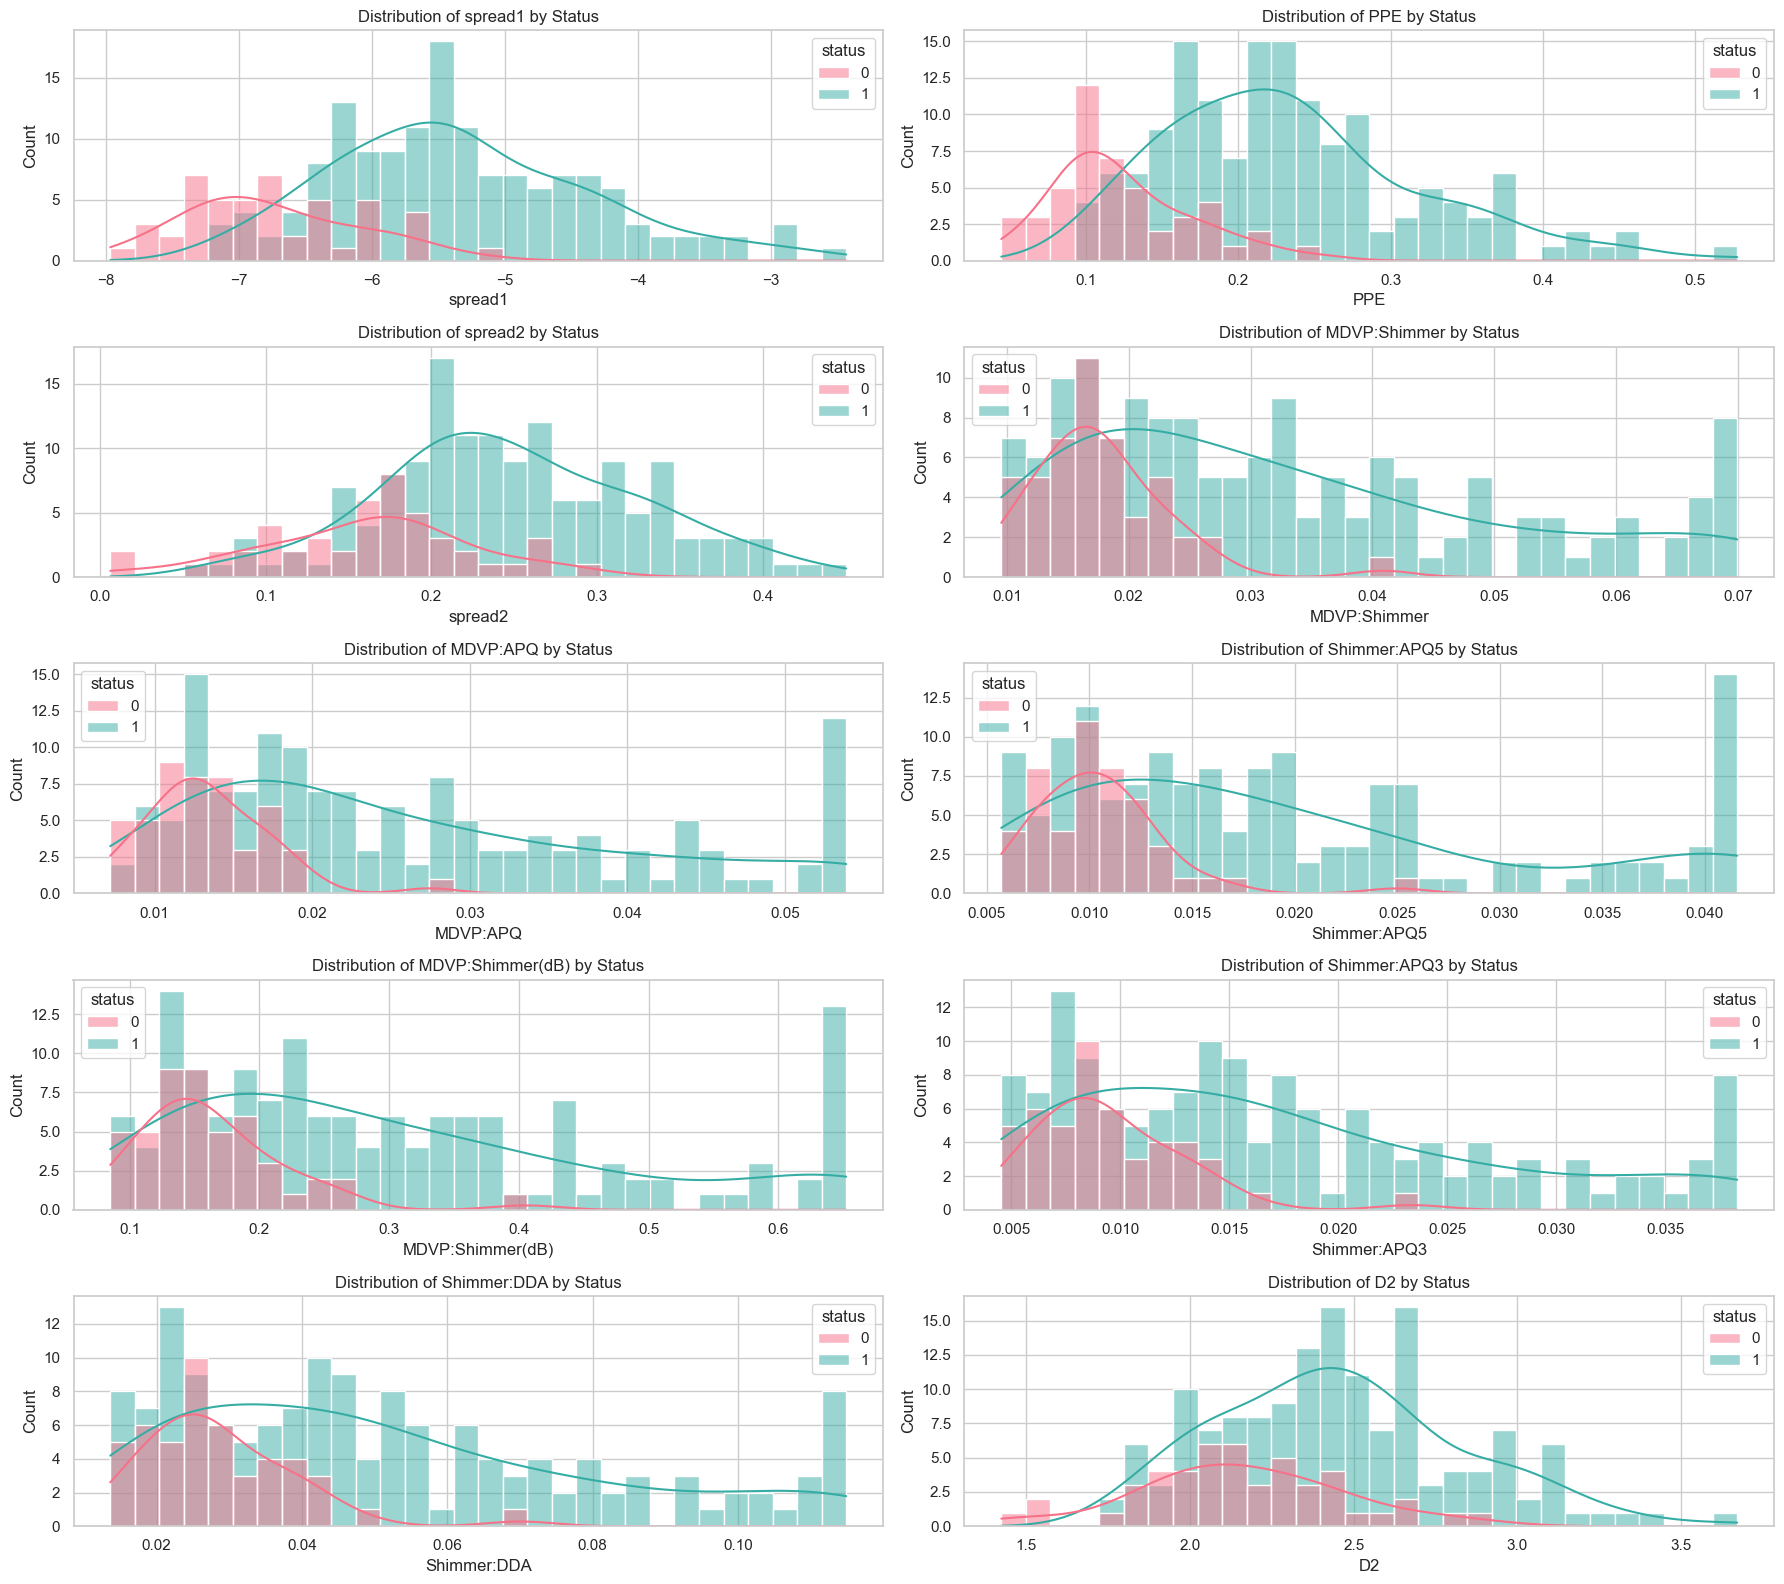

In [35]:
#Distribution plot for each features VS Target

import matplotlib.pyplot as plt
import seaborn as sns

# List of top features used
top_features = [
    'spread1', 'PPE', 'spread2', 'MDVP:Shimmer', 'MDVP:APQ',
    'Shimmer:APQ5', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
    'Shimmer:DDA', 'D2'
]

# Set the overall style
sns.set(style="whitegrid")

# Plot each feature distribution by target (status)
plt.figure(figsize=(18, 16))

for i, col in enumerate(top_features, 1):
    plt.subplot(5, 2, i)   # 5 rows, 2 columns
    sns.histplot(data=df, x=col, hue='status', kde=True, palette='husl', bins=30)
    plt.title(f"Distribution of {col} by Status")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [10]:
df = df.drop(columns=['name'])

In [4]:
corr = df.corr(numeric_only=True)

In [5]:
target_corr = corr['status'].sort_values(ascending=False)
print("\nCorrelation of features with status:\n")
display(target_corr)


Correlation of features with status:



status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)       -0.166136
HNR                -0.361515
MDVP:Flo(Hz)       -0.380200
MDVP:Fo(Hz)        -0.383535
Name: status, dtype: float64

In [6]:
# Select top 10 correlated features 
top_features = target_corr.drop('status').head(10).index.tolist()
print("\nTop 10 features correlated with 'status':")
print(top_features)


Top 10 features correlated with 'status':
['spread1', 'PPE', 'spread2', 'MDVP:Shimmer', 'MDVP:APQ', 'Shimmer:APQ5', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:DDA', 'D2']


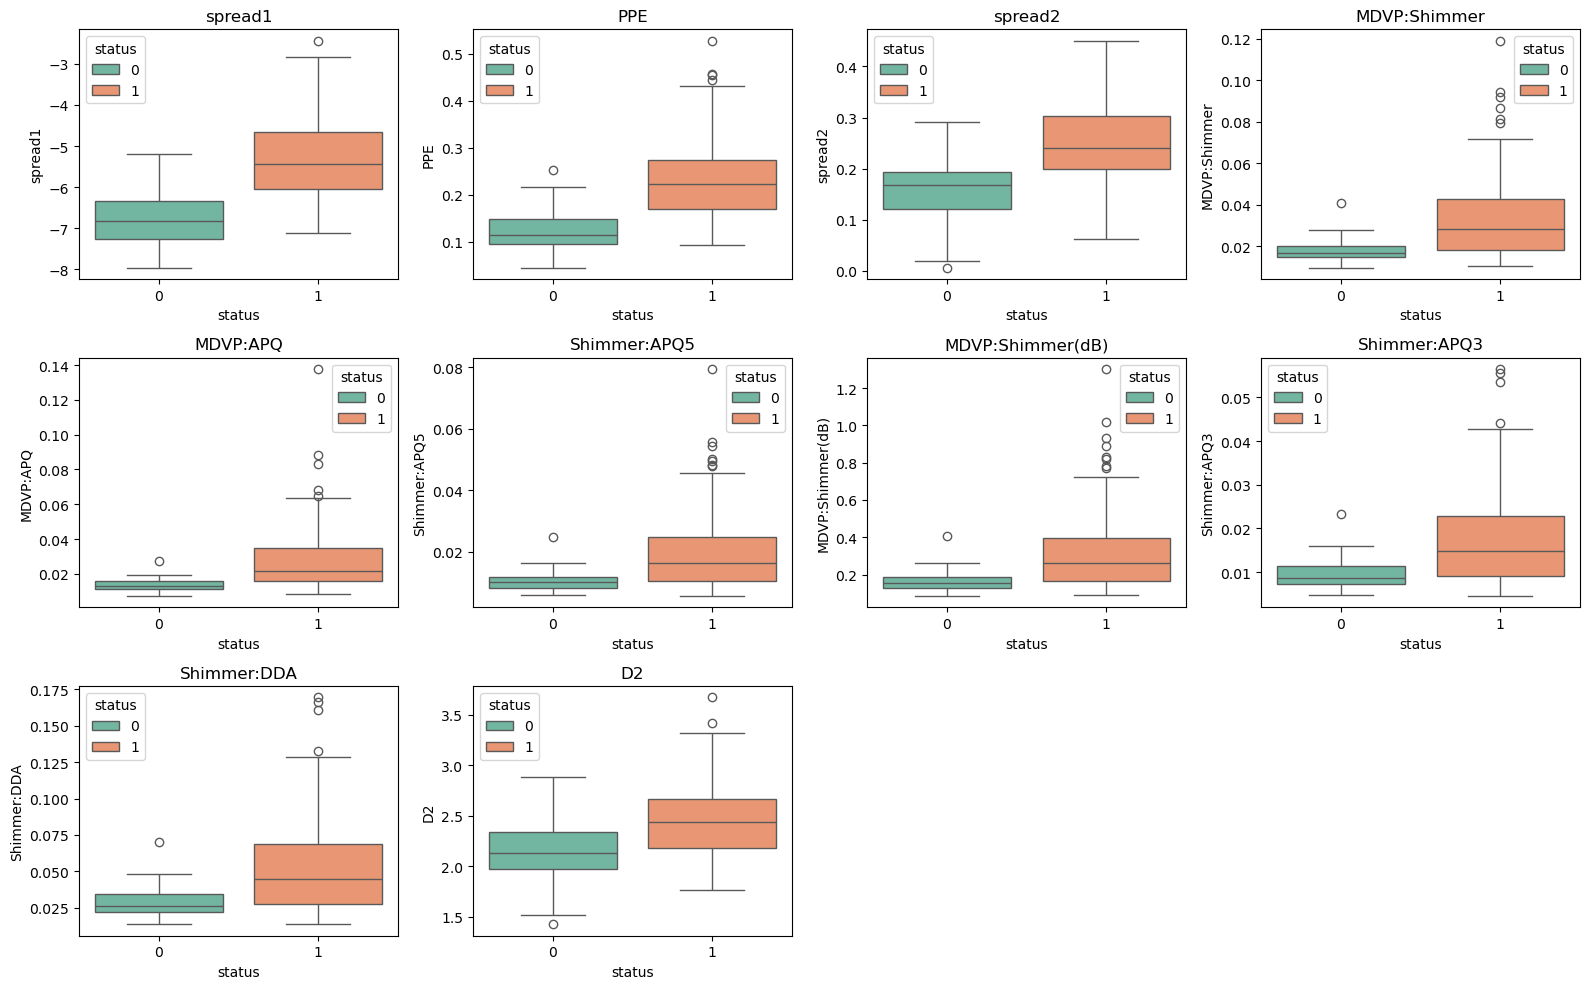

In [9]:
#Boxplot for outlier detection:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
for i, col in enumerate(top_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='status',hue='status', y=col, data=df, palette='Set2')
    plt.title(col)
plt.tight_layout()
plt.show()

In [10]:
# Columns with strong outliers 
outlier_cols = [
    'MDVP:Shimmer(dB)', 'MDVP:Shimmer', 'MDVP:APQ',
    'Shimmer:APQ5', 'Shimmer:APQ3', 'Shimmer:DDA'
]

# --- Function for capping using IQR ---
def cap_outliers(df, cols):
    df_capped = df.copy()
    for col in cols:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Capping
        df_capped[col] = np.where(df_capped[col] < lower_limit, lower_limit,
                                  np.where(df_capped[col] > upper_limit, upper_limit, df_capped[col]))
    return df_capped

# Apply capping
df_capped = cap_outliers(df, outlier_cols)

# Check if capping worked
for col in outlier_cols:
    print(f"{col} - before: {df[col].max():.3f}, after: {df_capped[col].max():.3f}")

MDVP:Shimmer(dB) - before: 1.302, after: 0.652
MDVP:Shimmer - before: 0.119, after: 0.070
MDVP:APQ - before: 0.138, after: 0.054
Shimmer:APQ5 - before: 0.079, after: 0.042
Shimmer:APQ3 - before: 0.056, after: 0.038
Shimmer:DDA - before: 0.169, after: 0.115


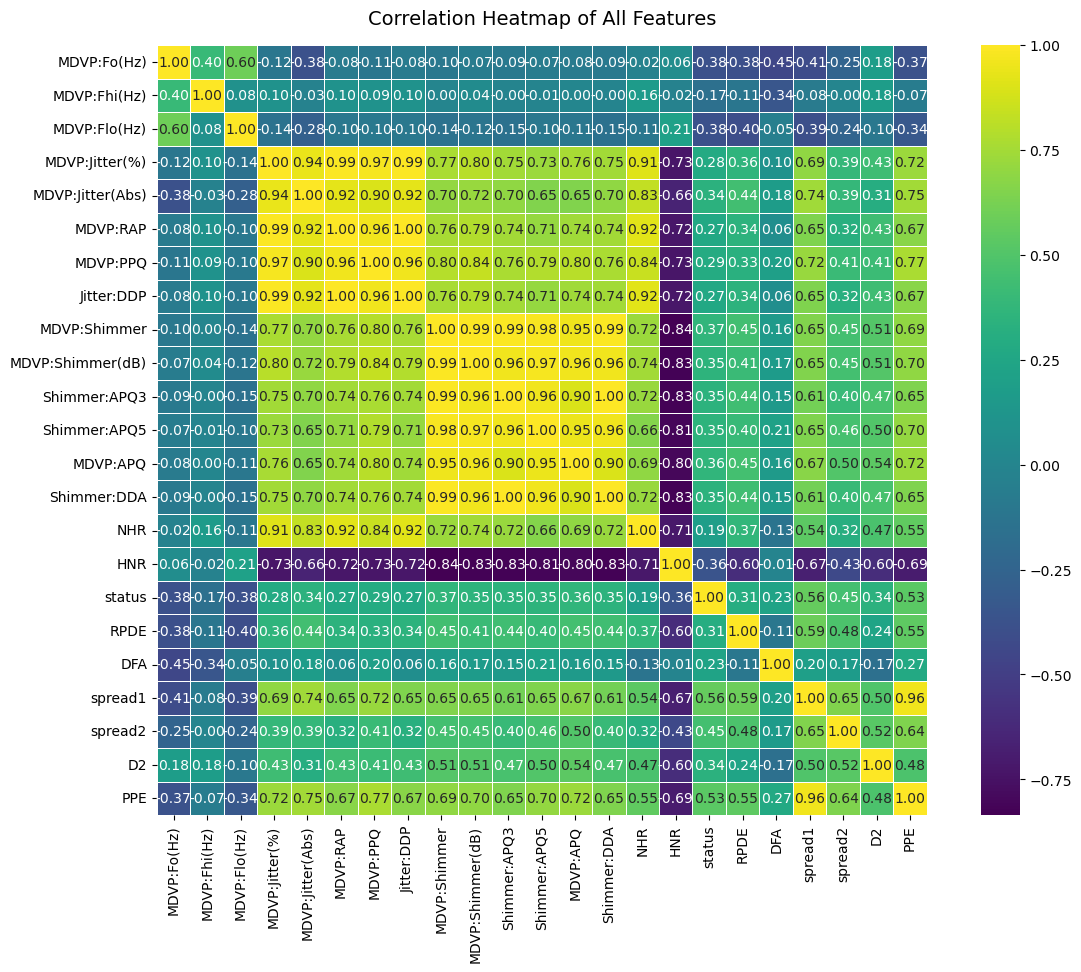

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(14, 10))

sns.heatmap(
    corr_matrix,
    cmap='viridis',     
    annot=True,          
    fmt=".2f",           
    linewidths=0.5,      
    square=True
)
plt.title("Correlation Heatmap of All Features", fontsize=14, pad=15)
plt.show()

In [12]:
df = df_capped.copy()

# top 10 correlated features 
top_features = [
    'spread1', 'PPE', 'spread2', 'MDVP:Shimmer', 'MDVP:APQ',
    'Shimmer:APQ5', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 
    'Shimmer:DDA', 'D2'
]

X = df[top_features]
y = df['status']

In [13]:
#Train-test split:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
#  Handle imbalance using SMOTE
from imblearn.over_sampling import SMOTE 

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [15]:
#  Feature scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [16]:
#  Model training using Random Forest 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200, random_state=42, class_weight='balanced_subsample'
)
model.fit(X_train_scaled, y_train_res)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=200,
                       random_state=42)

In [17]:
# Predictions 
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [18]:
# Evaluation 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_prob)
print("\n🔥 ROC-AUC Score:", roc_auc)

🎯 Accuracy: 0.7948717948717948

Confusion Matrix:
 [[ 8  2]
 [ 6 23]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.92      0.79      0.85        29

    accuracy                           0.79        39
   macro avg       0.75      0.80      0.76        39
weighted avg       0.83      0.79      0.80        39


🔥 ROC-AUC Score: 0.9206896551724139


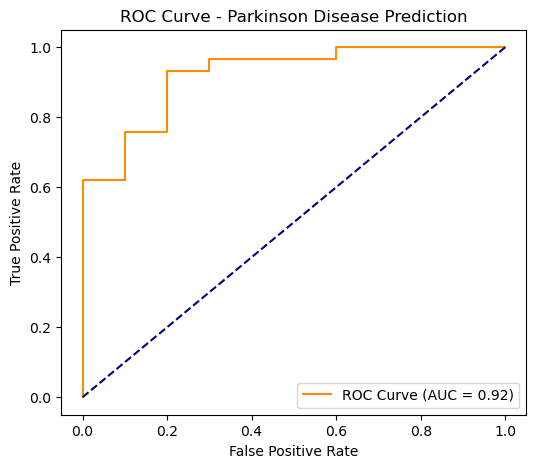

In [19]:
# ROC Curve

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Parkinson Disease Prediction')
plt.legend()
plt.show()

In [20]:

#  Save the pickle file
import pickle
with open("parkinson_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("parkinson_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)